$\newcommand{\TirName}[1]{\text{#1}}
\newcommand{\inferrule}[3][]{
  \let\and\qquad
  \begin{array}{@{}l@{}}
  \TirName{#1}
  \\
  \displaystyle
  \frac{#2}{#3}
  \end{array}
}
\newcommand{\infer}[3][]{\inferrule[#1]{#2}{#3}}
$

# Meeting 11 - Operational Semantics

Bor-Yuh Evan Chang  
Tuesday, October 1, 2024

<!-- 3 Expressions -->

<!-- 4 Binding and Scope -->

<!-- 8 Recursion -->

<!-- 9 Inductive Data Types -->

<!-- 11 Concrete Syntax -->

<!-- 12 Abstract Syntax and Parsing -->

<!-- 13 Exercise: Syntax -->

<!-- 14 Static Scoping -->

<!-- 15 Judgments -->

<!-- 16 Variables, Basic Values, and Judgments Lab -->

<!-- 18 Operational Semantics -->

<!-- 19 Functions and Dynamic Scoping -->

<!-- 20 Big-Step Exercise -->

<!-- 21 Evaluation Order  -->

<!-- Static Typing -->

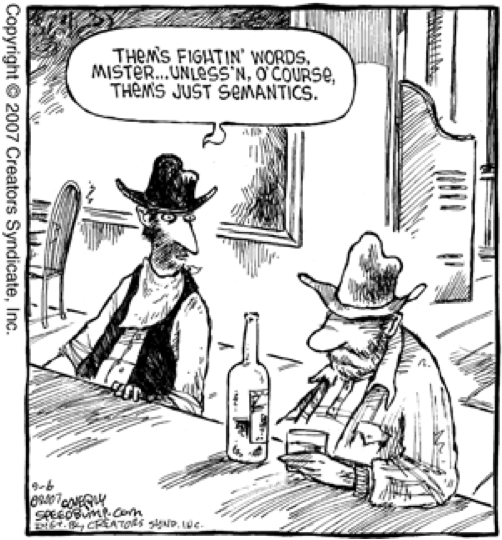

What questions does your neighbor have?

[ In-Class Slides](in-class/meeting11-operational-semantics.pdf)<br/> [
In-Class Jupyter](in-class/meeting11-operational-semantics.ipynb)<br/> [
Book
Chapter](https://csci3155.cs.colorado.edu/pppl-course/book/operational-semantics.html)

## Announcements

-   HW1 scores to be released later today
-   HW3 due Friday (or Monday?) 6pm
-   Peer Reviews on Unit 2 Thu-Fri Oct 3-4 to prepare for the exam
-   Exam on Units 1-2 next Tue Oct 8
    -   50 minutes in class
    -   Accommodation letters confirmed (some weeks ago)?
        -   Look out for note on Piazza about the extended-time location
        -   During class time
    -   Practice are all of the learning activities: HWs, Labs, Peer
        Review

## Today

-   [Feedback Rubric](https://csci3155.cs.colorado.edu/f24/rubric.html)
-   Peer Reviews
-   Preview HW3
-   [Operational
    Semantics](https://csci3155.cs.colorado.edu/pppl-course/book/operational-semantics.html)
-   Triage Your Questions
    -   Lab 2?

## Feedback Rubric

**4 - Exceeding (E)**

Student has met and exceeded the learning objective.

**3 - Proficient (P)**

Student has proficiently met the learning objective.

**2 - Approaching (A)**

Student is approaching the learning objective.

**1 - Novice (N)**

Student is far from meeting the learning objective.

**0 - Zero (Z)**

Student has made no attempt towards the learning objective.

-   Emphasizing learning activities over summative assessments.
-   Focus our attention on providing feedback on where you are at in
    meeting the learning objectives.
-   Deemphasizes “getting each point possible” and instead emphasizes
    giving you insight into where you are at in your learning journey.
-   “Getting the answers” is deemphasized in favor of going deeper and
    synthesizing what you learn.

## Feedback Rubric

**4 - Exceeding (E)**

Student demonstrates mastery and shows the ability to apply and transfer
learning with depth and complexity.

Student demonstrates synthesis of the underlying concepts. Student can
go beyond merely describing the solution to explaining the underlying
reasoning and discussing generalizations.

**3 - Proficient (P)**

Student demonstrates competence.

Student is able to explain the overall solution and can answer specific
questions. While the student is capable of explaining their solution,
they may not be able to confidently extend their explanation beyond the
immediate context.

**2 - Approaching (A)**

Student demonstrates partial understanding.

Student may able to describe the solution but has difficulty answering
specific questions about it. Student has difficulty explaining the
reasoning behind their solution.

-   Uses the full range of scores between 0-4 (not 50%-100%).
-   A score of 2 is not itself a failing grade, but it an indicator that
    you need to make some additional effort to reach a proficient score.
-   A score of 3 is a proficient grade, indicating you have met the
    basic learning objective.
-   **Philosophy**: Challenge you and make learning opportunities
    available. Give clear feedback on where you are at in your learning
    journey (in a competitive world). But do not penalize grade-wise.

## Grading Scale

| Level           | Percentage Range | Letter Grade |
|-----------------|------------------|--------------|
| Exceeding (E)   | 88% – 100%       | A            |
|                 | 82% – 88%        | A-           |
| Proficient (P)  | 75% – 82%        | B+           |
|                 | 68% – 75%        | B            |
|                 | 61% – 68%        | B-           |
|                 | 56% – 61%        | C+           |
|                 | 51% – 56%        | C            |
| Approaching (A) | 46% – 51%        | C-           |
|                 | 42% – 46%        | D+           |
|                 | 38% – 42%        | D            |
|                 | 34% – 38%        | D-           |

-   *Proficient (P)* everywhere (an average score of 3) is a B+ and
    solidly in the B range. Achieve *Exceeding (E)* in a few places gets
    you to an A-.
-   Intentionally, the B range (B- to B+) is the largest.
-   Exams will enable to you to show your learning level.

## Peer Reviews

Goal: Staff-organized 30-minute review session to prepare for the exam.

-   A day or two before the the sessions, the instructors will release a
    set of review questions on the unit (think: practice exam
    questions).
-   You sign up for a 30-minute slot to take turns asking each other
    these questions and giving feedback on where your partner is at on
    their learning journey (Novice, Approaching, Proficient, Exceeding).
-   Show up at your slot with the review questions and your laptop
    ready. No upfront prep other than completing the homework and lab.
-   A member of the Feedback Staff will join most sessions to offer
    guidance but will not be an interviewer. They are a third-party
    participant.
-   You do not “grade” your partner on their learning level but only
    assess to what extent your partner was an active participant. The
    Feedback Staff will do the same.

## Questions?

-   Review:
    -   What is relation between *judgment forms*, *inference rules*,
        and *judgments*?

## Questions?

# Operational Semantics

## Big Picture

What is the purpose of a language specification?







What is the difference between syntax and semantics?

-   We talked about grammars to unambiguously describe the syntax of a
    language.

-   We will now talk about a way to precisely describe the semantics of
    a language, called *operational semantics*.

-   Comment: There are several ways that PL folks describe semantics of
    PLs that have different properties. We will focus on one class
    called “operational semantics” that focuses on

    -   “How program expressions/statements execute?”
    -   “Describing an interpreter for the language.”

-   Interested in learning more about semantics: take CSCI 5535.

## Lab 2: JavaScript is Bananas

In [ ]:
true + 2

In [ ]:
"Hello, " + "World!"

In [ ]:
"b" + "a" + "n" + - "a" + "a" + "s"

How can we describe how to implement a interpreter for all JavaScripty
programs?

-   ECMA-262 standard is a rather precise specification based on natural
    language prose, but the descriptions are quite verbose.

-   Introduce some mathematical notation that enables us to specify
    semantics with less ambiguity in a very compact form.

-   Like any mathematical notation, its precise and compact nature makes
    it easier, for example, to spot errors or inconsistencies in
    specification. However, there will necessarily be a learning curve
    to reading the notation.

## Evaluation Judgment Form

$$
e \Downarrow v
$$

“Expression $e$ evaluates to value $v$.”

A set of inference rules defining such an evaluation judgment form is
called a *big-step operational semantics* for expressions $e$.

## Closed Expressions

$$
\begin{array}{rrrl}
\text{expressions} & e& \mathrel{::=}& v\mid e_1 \mathbin{\mathit{bop}} e_2
\\
\text{values} & v& \mathrel{::=}& n
\\
\text{binary operators} & \mathit{bop}& \mathrel{::=}& \texttt{+}
\\
\text{numbers} & n
\end{array}
$$

In [2]:
trait Expr // e
trait Bop  // bop

case class Binary(bop: Bop, e1: Expr, e2: Expr) extends Expr // e ::= e1 bop e2

case class N(n: Double) extends Expr // e ::= n
case object Plus extends Bop         // bop ::= +

def isValue(e: Expr): Boolean = e match {
  case N(_) => true
  case _ => false
}

val e_oneplustwo = Binary(Plus, N(1), N(2))

defined trait Expr 
defined trait Bop 
defined class Binary 
defined class N 
defined object Plus 
defined function isValue 
 e_oneplustwo : Binary = Binary (bop = Plus, e1 = N (n = 1.0 ), e2 = N (n = 2.0 ))

## EvalNum and EvalPlus Rules

$$
\inferrule[EvalNum]{
}{
  ???
}
$$

$$
\inferrule[EvalPlus]{
}{
  ???
}
$$

    \inferrule[EvalNum]{
    }{
      n \Downarrow n
    }

    \inferrule[EvalPlus]{
      e_1 \Downarrow n_1
      \and
      e_2 \Downarrow n_2
    }{
      e_1 \mathtt{+} e_2 \Downarrow \num_1 + \num_2
    }

## EvalNum and EvalPlus Code

In [3]:
def eval(e: Expr): Expr = ???

defined function eval

``` scala
def eval(e: Expr): Expr = e match {
  // EvalNum
  case n @ N(_) => n
  // EvalPlus
  case Binary(Plus, e1, e2) => {
    val N(n1) = eval(e1)
    val N(n2) = eval(e2)
    N(n1 + n2)
  }
}

e_oneplustwo
val v_oneplustwo = eval(e_oneplustwo)
assert(v_oneplustwo == N(3))
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">eval</span>
<span class="ansi-cyan-fg">res2_1</span>: <span class="ansi-green-fg">Binary</span> = <span class="ansi-yellow-fg">Binary</span>(bop = Plus, e1 = <span class="ansi-yellow-fg">N</span>(n = <span class="ansi-green-fg">1.0</span>), e2 = <span class="ansi-yellow-fg">N</span>(n = <span class="ansi-green-fg">2.0</span>))
<span class="ansi-cyan-fg">v_oneplustwo</span>: <span class="ansi-green-fg">Expr</span> = <span class="ansi-yellow-fg">N</span>(n = <span class="ansi-green-fg">3.0</span>)</pre>

# Dynamic Typing

## Booleans

$$
\begin{array}{rrrl}
\text{values} & v& \mathrel{::=}& b
\\
\text{booleans} & b
\end{array}
$$

In [5]:
case class B(b: Boolean) extends Expr // e ::= b

def isValue(e: Expr): Boolean = e match {
  case N(_) | B(_) => true
  case _ => false
}

val e_true = B(true)
val e_trueplustwo = Binary(Plus, e_true, N(2))

defined class B 
defined function isValue 
 e_true : B = B (b = true)
 e_trueplustwo : Binary = Binary (bop = Plus, e1 = B (b = true), e2 = N (n = 2.0 ))

## EvalVal

$$
\inferrule[EvalVal]{
}{
   v \Downarrow v
}
$$

In [6]:
def eval(e: Expr): Expr = ???

defined function eval

``` scala
def eval(e: Expr): Expr = e match {
  // EvalVal
  case v if isValue(v) => v
  // EvalPlus
  case Binary(Plus, e1, e2) => {
    val N(n1) = eval(e1)
    val N(n2) = eval(e2)
    N(n1 + n2)
  }
}

e_oneplustwo
val v_oneplustwo = eval(e_oneplustwo)
assert(v_oneplustwo == N(3))

e_true
val v_true = eval(e_true)
assert(v_true == B(true))
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">eval</span>
<span class="ansi-cyan-fg">res5_1</span>: <span class="ansi-green-fg">Binary</span> = <span class="ansi-yellow-fg">Binary</span>(bop = Plus, e1 = <span class="ansi-yellow-fg">N</span>(n = <span class="ansi-green-fg">1.0</span>), e2 = <span class="ansi-yellow-fg">N</span>(n = <span class="ansi-green-fg">2.0</span>))
<span class="ansi-cyan-fg">v_oneplustwo</span>: <span class="ansi-green-fg">Expr</span> = <span class="ansi-yellow-fg">N</span>(n = <span class="ansi-green-fg">3.0</span>)
<span class="ansi-cyan-fg">res5_4</span>: <span class="ansi-green-fg">B</span> = <span class="ansi-yellow-fg">B</span>(b = true)
<span class="ansi-cyan-fg">v_true</span>: <span class="ansi-green-fg">Expr</span> = <span class="ansi-yellow-fg">B</span>(b = true)</pre>

## MatchError

In [8]:
e_trueplustwo
val v_trueplustwo = eval(e_trueplustwo)

-   The particular issue is that $+$ can only apply to numbers in the
    $\TirName{EvalPlus}$ rule: specifically, $n_1 + n_2$.
-   When the operator does not apply to input values, this is called a
    *type error*.
-   If we detect type error at run time, then this is called *dynamic
    typing*.

## DynamicTypeError

In [9]:
case class DynamicTypeError(e: Expr) extends Exception {
  override def toString: String = s"TypeError: in expression $e"
}

defined class DynamicTypeError

In [10]:
def eval(e: Expr): Expr = ???

defined function eval

``` scala
def eval(e: Expr): Expr = e match {
  // EvalVal
  case v if isValue(v) => v
  case Binary(Plus, e1, e2) => {
    (eval(e1), eval(e2)) match {
      // EvalPlus
      case (N(n1), N(n2)) => N(n1 + n2)
      // Otherwise, we have a type error.
      case _ => throw DynamicTypeError(e)
    }
  }
}
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">eval</span></pre>

In [12]:
e_trueplustwo
val v_trueplustwo = eval(e_trueplustwo)

# Coercions

## toNumber

$\fbox{$v \rightsquigarrow n$}$

$\inferrule[ToNumberNum]{
}{
  n \rightsquigarrow n
}$

$\inferrule[ToNumberTrue]{
}{
  \mathbf{true} \rightsquigarrow 1
}$

$\inferrule[ToNumberFalse]{
}{
  \mathbf{true} \rightsquigarrow 0
}$

In [13]:
def toNumber(e: Expr): Double = ???

defined function toNumber

``` scala
def toNumber(e: Expr): Double = {
  require(isValue(e))
  e match {
    // ToNumberNum
    case N(n) => n
    // ToNumberTrue
    case B(true) => 1
    // ToNumberFalse
    case B(false) => 0
  }
}
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">toNumber</span></pre>

## EvalVal and EvalPlus

$$
\inferrule[EvalVal]{
}{
  ???
}
$$

$$
\inferrule[EvalPlus]{
}{
  ???
}
$$

$\inferrule[EvalVal]{
  \phantom{\Downarrow}
}{
   v \Downarrow v
}$

$\inferrule[EvalPlus]{
   e_1  \Downarrow v_1
  \and
   e_2  \Downarrow v_2
  \and
  v_1 \rightsquigarrow n_1
  \and
  v_2 \rightsquigarrow n_2
}{
   e_1 \mathbin{\texttt{+}} e_2  \Downarrow n_1 + n_2 
}$

# Variables

## Syntax

$$
\begin{array}{rrrl}
\text{expressions} & e& \mathrel{::=}&  x\mid\mathbf{const}\;x\;\texttt{=}\;e_1\texttt{;}\;e_2
\\
\text{variables} & x, y
\end{array}
$$

In [15]:
case class Var(x: String) extends Expr                           // e ::= x
case class ConstDecl(x: String, e1: Expr, e2: Expr) extends Expr // e ::= const x = e1; e2

val e_const_i_two_trueplusi = ConstDecl("i", N(2), Binary(Plus, B(true), Var("i")))

type Env = Map[String, Expr]
val empty: Env = Map.empty
def lookup(env: Env, x: String): Expr = env(x)
def extend(env: Env, x: String, v: Expr): Env = {
  require(isValue(v))
  env + (x -> v)
}

defined class Var 
defined class ConstDecl 
 e_const_i_two_trueplusi : ConstDecl = ConstDecl (
 x = "i" ,
 e1 = N (n = 2.0 ),
 e2 = Binary (bop = Plus, e1 = B (b = true), e2 = Var (x = "i" ))
)
defined type Env 
 empty : Env = Map ()
defined function lookup 
defined function extend

## Value Environments

$$
\begin{array}{rrrl}
  \text{value environments} & E, \mathit{env}& \mathrel{::=}& \cdot \mid E[\mathop{}x \mapsto v]
\end{array}
$$

## Semantics

$$
\inferrule[EvalVar]{
}{
  ???
}
$$

$$
\inferrule[EvalConstDecl]{
}{
  ???
}
$$

$\inferrule[EvalVar]{
  \phantom{\Downarrow}
}{
  E \vdash  x \Downarrow E(x) 
}$

$\inferrule[EvalConstDecl]{
  E \vdash  e_1  \Downarrow v_1 
  \and
  E[\mathop{}x \mapsto v_1] \vdash  e_2  \Downarrow v_2 
}{
  E \vdash 
    \mathbf{const}\;x\;\texttt{=}\;e_1\texttt{;}\;e_2
   \Downarrow v_2 
}$

## Variables, Numbers, and Booleans

$\inferrule[EvalVar]{
  \phantom{\Downarrow}
}{
  E \vdash  x \Downarrow E(x) 
}$

$\inferrule[EvalConstDecl]{
  E \vdash  e_1  \Downarrow v_1 
  \and
  E[\mathop{}x \mapsto v_1] \vdash  e_2  \Downarrow v_2 
}{
  E \vdash 
    \mathbf{const}\;x\;\texttt{=}\;e_1\texttt{;}\;e_2
   \Downarrow v_2 
}$

$\inferrule[EvalVal]{
  \phantom{\Downarrow}
}{
  E \vdash  v \Downarrow v
}$

$\inferrule[EvalNeg]{
  E \vdash  e_1  \Downarrow v_1 
  \and
  v_1 \rightsquigarrow n_1
}{
  E \vdash  \mathop{\texttt{-}} e_1  \Downarrow - n_1 
}$

$\inferrule[EvalNot]{
  E \vdash  e_1  \Downarrow v_1 
  \and
  v_1 \rightsquigarrow b_1
}{
  E \vdash 
    \mathop{\texttt{!}} e_1
   \Downarrow \lnot b_1 
}$

$\inferrule[EvalArith]{
  E \vdash  e_1  \Downarrow v_1 
  \and
  E \vdash  e_2  \Downarrow v_2 
  \and
  v_1 \rightsquigarrow n_1
  \and
  v_2 \rightsquigarrow n_2
  \and
  \mathit{bop}\in \left\{  \texttt{+}, \texttt{-}, \texttt{*}, \texttt{/} \right\}
}{
  E \vdash 
    e_1 \mathbin{\mathit{bop}} e_2
   \Downarrow n_1 \mathbin{\mathit{bop}} n_2 
}$

$\inferrule[EvalAndTrue]{
  E \vdash  e_1  \Downarrow v_1 
  \and
  v_1 \rightsquigarrow \mathbf{true}
  \and
  E \vdash  e_2  \Downarrow v_2 
}{
  E \vdash 
    e_1 \mathbin{\texttt{\&\&}} e_2
   \Downarrow v_2 
}$

$\inferrule[EvalAndFalse]{
  E \vdash  e_1  \Downarrow v_1 
  \and
  v_1 \rightsquigarrow \mathbf{false}
}{
  E \vdash 
    e_1 \mathbin{\texttt{\&\&}} e_2
   \Downarrow v_1 
}$

$\inferrule[EvalOrTrue]{
  E \vdash  e_1  \Downarrow v_1 
  \and
  v_1 \rightsquigarrow \mathbf{true}
}{
  E \vdash 
    e_1 \mathbin{\texttt{||}} e_2
   \Downarrow v_1 
}$

$\inferrule[EvalOrFalse]{
  E \vdash  e_1  \Downarrow v_1 
  \and
  v_1 \rightsquigarrow \mathbf{false}
  \and
  E \vdash  e_2  \Downarrow v_2 
}{
  E \vdash 
    e_1 \mathbin{\texttt{||}} e_2
   \Downarrow v_2 
}$

$\inferrule[EvalIfTrue]{
  E \vdash  e_1  \Downarrow v_1 
  \and
  v_1 \rightsquigarrow \mathbf{true}
  \and
  E \vdash  e_2  \Downarrow v_2 
}{
  E \vdash 
    e_1\;\texttt{?}\;e_2\;\texttt{:}\;e_3
   \Downarrow v_2 
}$

$\inferrule[EvalIfFalse]{
  E \vdash  e_1  \Downarrow v_1 
  \and
  v_1 \rightsquigarrow \mathbf{false}
  \and
  E \vdash  e_3  \Downarrow v_3 
}{
  E \vdash 
    e_1\;\texttt{?}\;e_2\;\texttt{:}\;e_3
   \Downarrow v_3 
}$

$\inferrule[EvalEquality]{
  E \vdash  e_1  \Downarrow v_1 
  \and
  E \vdash  e_2  \Downarrow v_2 
  \and
  \mathit{bop}\in \left\{  \texttt{===}, \texttt{!==} \right\}
}{
  E \vdash 
    e_1 \mathbin{\mathit{bop}} e_2
   \Downarrow v_1 \mathbin{\mathit{bop}} v_2 
}$

$\inferrule[EvalInequality]{
  E \vdash  e_1  \Downarrow v_1 
  \and
  E \vdash  e_2  \Downarrow v_2 
  \and
  v_1 \rightsquigarrow n_1
  \and
  v_2 \rightsquigarrow n_2
  \and
  \mathit{bop}\in \left\{  \texttt{<}, \texttt{<=}, \texttt{>}, \texttt{>=} \right\}
}{
  E \vdash 
    e_1 \mathbin{\mathit{bop}} e_2
   \Downarrow n_1 \mathbin{\mathit{bop}} n_2  
}$